In [1]:
%load_ext autotime
%load_ext autoreload
%autoreload 2

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
import matplotlib.pyplot as plt

#plotly 3d check

1.5.0
True
time: 1.43 s


In [5]:
%run -i sunRay_v0

----------------------------------
Frequency : 35.045MHz
Compute with : cpu
----------------------------------
Refraction dt : 0.036452312
Scattering dt : 0.0014974868
Absorb  t     : 11.900677
  1%|          | 577/95996 [00:13<37:46, 42.11it/s]


KeyboardInterrupt: 

In [ ]:
# functionallize SunRayRun

In [8]:
nu_e0

tensor([0.9288])

time: 4.04 ms


In [ ]:
torch.sort(tau)[0][0]

In [ ]:
1/dt_nu0
nu_s0.cpu()
(3*4.605/nu_e0.cpu() + 30*c_r)*nu_s0.cpu()


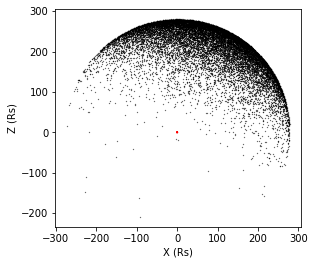

time: 2.97 s


In [4]:
# plot the position in process
idx = -1

plt.plot(r_vec_collect_local[idx,0,:],r_vec_collect_local[idx,2,:],'k.',markersize=0.5)
plt.plot(np.sin(np.linspace(0,np.pi*2,300)),
        np.cos(np.linspace(0,np.pi*2,300)),'r')
plt.xlabel('X (Rs)')
plt.ylabel('Z (Rs)')
plt.gca().set_aspect('equal')

In [ ]:
# plot ray

idx_select = np.nonzero(((r_vec_collect_local[-1,0,:])**2+r_vec_collect_local[-1,1,:]**2)>0.5)
for num in (idx_select):
        plt.plot(r_vec_collect_local[:,2,num],r_vec_collect_local[:,0,num])
        plt.gca().set_aspect('equal')

In [ ]:
# inspect ray 
idx_select = np.nonzero(((r_vec_collect_local[-1,1,:])**2+r_vec_collect_local[-1,2,:]**2)<0.2)

idx_select = np.nonzero(((torch.sum(r_vec_collect[0,:,:].reshape(-1,3)*k_vec_collect[0,:,:].reshape(-1,3),1))).cpu()>1000)
#hst = plt.hist(k_vec_collect_local[0,:,idx_select])

#hst=plt.hist(torch.sum(r_vec_collect[99,:,idx_select].reshape(-1,3)*k_vec_collect[99,:,idx_select].reshape(-1,3),1).cpu().data.numpy(),100)
print(len(idx_select))
plt.plot(r_vec_collect_local[-1,0,idx_select],r_vec_collect_local[-1,2,idx_select],'k.',markersize=0.5)
plt.plot(np.sin(np.linspace(0,np.pi*2,300)),
        np.cos(np.linspace(0,np.pi*2,300)),'r')
plt.xlabel('X (Rs)')
plt.ylabel('Z (Rs)')
plt.gca().set_aspect('equal')

In [ ]:
idx_select = np.nonzero(((r_vec_collect_local[-1,1,:])**2+r_vec_collect_local[-1,2,:]**2)>1)

#hst=plt.hist(((torch.sum(r_vec_collect[0,:,:].reshape(-1,3)*k_vec_collect[0,:,:].reshape(-1,3),1))).numpy(),100)

hst=plt.hist(((torch.sum(r_vec[:,idx_select]*k_vec[:,idx_select],axis=0)).view(-1)).cpu().numpy(),500)

In [ ]:
hst=plt.hist(((torch.sum(r_vec.cpu()[:,:]*k_vec.cpu()[:,:],axis=0))).numpy(),100)

In [ ]:
plt.plot(k_vec_collect[0,0,:],k_vec_collect[0,1,:],'k.')

In [ ]:
freq = pfreq.omega_pe_r(ne_r,torch.Tensor(np.linspace(2,50,400)).to(dev_u))/(2*PI)

In [ ]:
cProfile.run('exec(open("sunRay_v0.py").read())')

In [ ]:
kc_cur/kc_norm

In [ ]:
t_collect.shape

In [ ]:
plt.plot(k_vec_collect[:,0,0],k_vec_collect[:,0,1],'k.')

In [ ]:
for num in range(100):
    plt.plot(r_vec_collect[:,2,num],r_vec_collect[:,1,num])
    plt.axis('equal')

In [ ]:
amp = lambda x : torch.sqrt(torch.sum(x.pow(2),axis=0))

plt.plot(amp(r_vec),amp(domega_pe_dxyz),'k.')

In [ ]:
domega_pe_dr.repeat(3,1).shape

In [ ]:
pfreq.omega_pe_r(ne_r,rr_cur)[0]

In [ ]:
rr_test = torch.linspace(20,100,100)
plt.plot(rr_test,pfreq.omega_pe_r(ne_r,rr_test))


In [ ]:
rr_cur

In [ ]:
start_r

In [ ]:
r_vec_collect.shape[2]

In [ ]:
# a test for the transformation

In [ ]:
# rotate the k vec into the r-z coordinate
kcx = - kx_cur*torch.sin(fi) + ky_cur*torch.cos(fi) 
kcy = (- kx_cur*costheta*torch.cos(fi) 
    - ky_cur*costheta*torch.sin(fi) + kz_cur*sintheta) 
kcz = (  kx_cur*sintheta*torch.cos(fi) 
    + ky_cur*sintheta*torch.sin(fi) + kz_cur*costheta)


kx_cur1 = (-kcx*torch.sin(fi) 
    -kcy*costheta*torch.cos(fi) +kcz*sintheta*torch.cos(fi) )
ky_cur1 = ( kcx*torch.cos(fi) 
    -kcy*costheta*torch.sin(fi) +kcz*sintheta*torch.sin(fi) )
kz_cur1 =  kcy*sintheta+kcz*costheta


In [ ]:
torch.max(kz_cur1/kz_cur-1)

In [ ]:
torch.atan(torch.Tensor([2]))

In [ ]:
plt.hist(torch.sum(r_vec*k_vec,0).cpu())

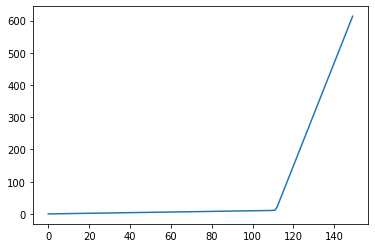

time: 412 ms


In [7]:
plt.plot(np.array(np.array(t_collect_local)))

In [4]:
np.savez('sunray_big_float32_20deg.npz', steps_N  = steps_N, collect_N = collect_N,
    photon_N = photon_N, start_r = start_r, start_theta = start_theta,
    start_phi  = start_phi, f_ratio  = f_ratio, epsilon = epsilon ,
    anis = anis, asym = asym,
    omega0=omega0.cpu(),
    freq0=freq0.cpu(),
    t_collect=t_collect.cpu(), tau=tau.cpu(),
    r_vec_collect_local=r_vec_collect_local,
    k_vec_collect_local=k_vec_collect_local,
    tau_collect_local = tau_collect_local)

time: 15.3 s


(4672,)

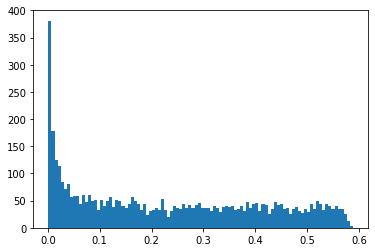

time: 4.93 s


In [6]:
from sunRay.statisticalRays import collectXYtatR

(x_im_stat,y_im_stat,t_reach_stat,weights_stat,t_free_stat) = collectXYtatR(photon_N,r_vec_collect_local,k_vec_collect_local,t_collect.cpu(),tau_collect_local,omega0.cpu(),14.96)

#hst = plt.hist(t_free_stat,20)
hst = plt.hist(weights_stat,100)
#plt.xlim(30,40)
x_im_stat.shape

torch.return_types.sort(
values=tensor([270.8511, 273.0056, 273.2140,  ...,      nan,      nan,      nan],
       device='cuda:0'),
indices=tensor([ 5066, 14473, 15095,  ..., 19989, 19990, 19994], device='cuda:0'))

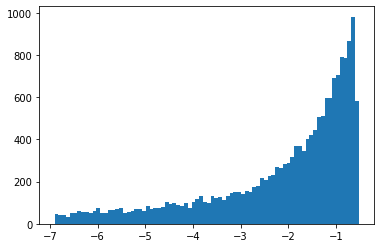

time: 723 ms


In [7]:
hst=plt.hist((-tau.cpu()),80)
torch.sort(rr_cur)

1.1621552739376544


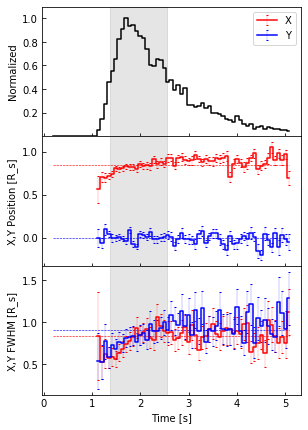

time: 1.58 s


In [8]:
from sunRay.showPlot import XYVariationPlot
XYVariationPlot(x_im_stat,y_im_stat,t_reach_stat,weights_stat,t_step = 0.07)

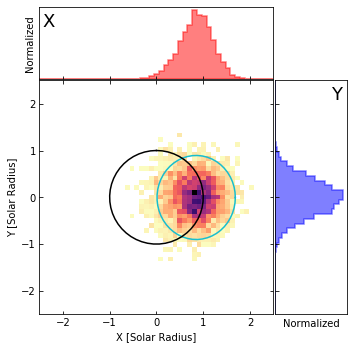

time: 1.19 s


In [9]:



from sunRay.showPlot import XYDistributionImageHist

XYDistributionImageHist(x_im_stat,y_im_stat,bins_data=np.linspace(-2.5,2.5,50)
            ,weights_data=weights_stat)

In [20]:
r_vec

tensor([[-17.6898, -10.5367,  14.8671,  ...,  39.0303,  31.4664,      nan],
        [  2.4447,  -9.2189, -19.9277,  ...,   6.3433, -31.0992,      nan],
        [ 46.2711,  47.4065,  42.8635,  ...,  30.7063,  22.0096,      nan]],
       device='cuda:0')

time: 29 ms


In [64]:
print(np.sqrt(np.sum((r_vec_collect_local[0,:,140])**2)))
        

1.7500131
time: 120 ms


In [60]:
tau

tensor([ 3.9117, 28.4730,  6.2318,  ..., 14.9384,  6.8073,  6.1856])

time: 134 ms
